In [2]:
import shutil

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import tensorflow as tf
import zipfile
import os

In [8]:
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Dropout,Flatten

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
from tensorflow.keras.models import Sequential

In [14]:
import matplotlib.pyplot as plt

In [16]:
from tensorflow.keras.optimizers import Adam

In [18]:
from tensorflow.keras.applications import VGG19

In [20]:
file_path = "C:/Users/userr/DL LAB EXAM/Animals.zip"
extracted_path = "C:/Users/userr/DL LAB EXAM"

In [22]:
with zipfile.ZipFile(file_path,'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [24]:
raw_path =  "C:/Users/userr/DL LAB EXAM/Animals/Animals/raw-img"

In [26]:
base_dir = 'dataset'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

In [28]:
os.makedirs(train_dir,exist_ok=True)
os.makedirs(test_dir,exist_ok=True)

In [30]:
for animal_classes in os.listdir(raw_path):
    class_path = os.path.join(raw_path,animal_classes)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        train_data,test_data = train_test_split(images,test_size=0.2,random_state=42)

        os.makedirs(os.path.join(train_dir,animal_classes),exist_ok = True)
        os.makedirs(os.path.join(test_dir,animal_classes),exist_ok = True)

        for f in train_data:
            shutil.move(os.path.join(class_path,f),os.path.join(train_dir,animal_classes,f))
        for f in test_data:
            shutil.move(os.path.join(class_path,f),os.path.join(test_dir,animal_classes,f))
        

In [32]:
image_size = (224,224)
batch_size = 128

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [34]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 1296 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [36]:
#Custom CNN model
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(32,activation='relu'),
    Dropout(0.5),
    Dense(4,activation='softmax')
])

C:\Users\userr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
custom_cnn = model.fit(train_data,validation_data=test_data,epochs=10)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.2847 - loss: 1.4043 - val_accuracy: 0.3589 - val_loss: 1.3764
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 713ms/step - accuracy: 0.2577 - loss: 1.3811 - val_accuracy: 0.2515 - val_loss: 1.3761
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 719ms/step - accuracy: 0.2469 - loss: 1.3734 - val_accuracy: 0.3405 - val_loss: 1.3656
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 715ms/step - accuracy: 0.2963 - loss: 1.3705 - val_accuracy: 0.3558 - val_loss: 1.3582
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 645ms/step - accuracy: 0.3040 - loss: 1.3518 - val_accuracy: 0.3804 - val_loss: 1.3253
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 645ms/step - accuracy: 0.2994 - loss: 1.3418 - val_accuracy: 0.3926 - val_loss: 1.3326
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 656ms/step - accuracy: 0.3148 - loss: 1.3303 - val_accuracy: 0.3466 - val_loss: 1.3081
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 678ms/step - accuracy: 0.3002 - loss: 1.3283 - val_accuracy: 0.35

In [44]:
#VGG-19 model
vgg_base = VGG19(weights='imagenet',include_top=True,input_shape=(224,224,3))
vgg_model = Sequential([
    vgg_base,
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [46]:
vgg_model.compile(optimizer=Adam(0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [48]:
vgg = vgg_model.fit(train_data, validation_data=test_data, epochs=3)

Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 593s 55s/step - accuracy: 0.2454 - loss: 1.3866 - val_accuracy: 0.2546 - val_loss: 1.3863
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 631s 57s/step - accuracy: 0.2500 - loss: 1.3867 - val_accuracy: 0.2546 - val_loss: 1.3863
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 643s 59s/step - accuracy: 0.2508 - loss: 1.3857 - val_accuracy: 0.2546 - val_loss: 1.3863


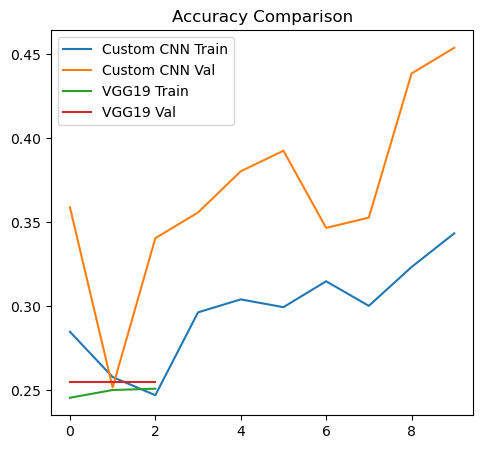

In [52]:
def plot_metrics(cnn,vgg_model, label1="Custom CNN", label2="VGG19"):
    plt.figure(figsize=(12,5))
    
    # Accuracy comparison
    plt.subplot(1,2,1)
    plt.plot(cnn.history['accuracy'], label=f'{label1} Train')
    plt.plot(cnn.history['val_accuracy'], label=f'{label1} Val')
    plt.plot(vgg_model.history['accuracy'], label=f'{label2} Train')
    plt.plot(vgg_model.history['val_accuracy'], label=f'{label2} Val')
    plt.title("Accuracy Comparison")
    plt.legend()
plot_metrics(custom_cnn,vgg)